In [1]:
#First let's load in the packages we need
library(tidyverse)
library(knitr) #for descriptive tables
install.packages("skimr") #for nice summary plots
library(skimr)
install.packages("viridis") #for colourblind-friendly palette
library(viridis)
install.packages("table1")
library(table1) #for nice 'Table 1' for papers

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.3      ✔ purrr   1.0.1 
✔ tibble  3.2.1      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.4      ✔ forcats 1.0.0 
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘knit

In [2]:
# Read in processed Data
master_data <- read_csv('../data/master_data.csv')

Rows: 894 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): gp_practice, DataZone
dbl (19): gp_number, PracticeListSize, q1_positive, q2_positive, q3_positive...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
dim(master_data)
head(master_data)

[1] 894  21

gp_practice,gp_number,DataZone,PracticeListSize,q1_positive,q2_positive,q3_positive,income_rank,employment_rank,health_rank,⋯,education_rank,access_rank,employment_rate,CIF,working_age_percentage,urban_location,minority_pop,age_distribution,gender_distribution,employment_percentage
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abbey Medical Centre - Paisley (87625),87625,S01012126,11096,73.31,97.44,91.45,4547,4358,4365,⋯,4351,4678,0.06,65,75.30,1,8.46,71.12,50.11,77.1
Abercromby Practice - Glasgow (46555),46555,S01010055,3281,78.51,93.93,87.44,195,69,10,⋯,416,5869,0.31,250,69.65,1,9.06,69.95,48.86,69.8
Aberfeldy And Kinloch Rannoch Medical Practice - Aberfeldy (10036),10036,S01012014,4758,87.11,95.03,98.06,3725,3780,4372,⋯,3288,6676,0.07,70,59.16,0,9.93,60.53,49.52,75.3
Aberfoyle & Buchlyvie Medical Centres - Buchlyvie (25968),25968,S01013014,2348,81.81,92.53,94.82,4669,5111,5130,⋯,5819,3789,0.04,55,63.15,0,3.42,64.95,51.36,74.8
Aberlour Health Centre - Aberlour (33004),33004,S01011052,3319,25.34,53.32,67.33,5087,4575,4416,⋯,4618,5033,0.05,55,53.82,0,7.13,61.22,49.47,75.3
Abingdon Medical Practice - Glasgow (40070),40070,S01010386,3988,73.95,70.04,88.54,987,1350,696,⋯,1849,6890,0.15,195,81.96,1,14.25,82.37,49.25,69.8


In [4]:
# Recode urban_location to factors
master_data <- master_data %>%
    rename(urban_rural = urban_location) %>%
    mutate(urban_rural = as.factor(urban_rural) %>%
           fct_recode("Urban" = "1",
                      "Rural" = "0"))

summary(master_data$urban_rural)

Rural Urban 
  224   670

In [5]:
# ranks to deciles

# Define bin edges
bin_edges <- c(1, 1395, 2790, 4185, 5580, 6976)

# Create labelled income_decile column
master_data$income_quintile <- cut(master_data$income_rank, breaks = bin_edges, labels = c(1:5))
master_data$employment_quintile <- cut(master_data$employment_rank, breaks = bin_edges, labels = c(1:5))
master_data$housing_quintile <- cut(master_data$housing_rank, breaks = bin_edges, labels = c(1:5))

# Drop unneeded columns for regression
master_data <- master_data %>%
    select(-health_rank, -education_rank, -access_rank)

In [6]:
head(master_data)

gp_practice,gp_number,DataZone,PracticeListSize,q1_positive,q2_positive,q3_positive,income_rank,employment_rank,housing_rank,⋯,CIF,working_age_percentage,urban_rural,minority_pop,age_distribution,gender_distribution,employment_percentage,income_quintile,employment_quintile,housing_quintile
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Abbey Medical Centre - Paisley (87625),87625,S01012126,11096,73.31,97.44,91.45,4547,4358,2335,⋯,65,75.30,Urban,8.46,71.12,50.11,77.1,4,4,2
Abercromby Practice - Glasgow (46555),46555,S01010055,3281,78.51,93.93,87.44,195,69,215,⋯,250,69.65,Urban,9.06,69.95,48.86,69.8,1,1,1
Aberfeldy And Kinloch Rannoch Medical Practice - Aberfeldy (10036),10036,S01012014,4758,87.11,95.03,98.06,3725,3780,3547,⋯,70,59.16,Rural,9.93,60.53,49.52,75.3,3,3,3
Aberfoyle & Buchlyvie Medical Centres - Buchlyvie (25968),25968,S01013014,2348,81.81,92.53,94.82,4669,5111,5314,⋯,55,63.15,Rural,3.42,64.95,51.36,74.8,4,4,4
Aberlour Health Centre - Aberlour (33004),33004,S01011052,3319,25.34,53.32,67.33,5087,4575,2738,⋯,55,53.82,Rural,7.13,61.22,49.47,75.3,4,4,2
Abingdon Medical Practice - Glasgow (40070),40070,S01010386,3988,73.95,70.04,88.54,987,1350,172,⋯,195,81.96,Urban,14.25,82.37,49.25,69.8,1,1,1


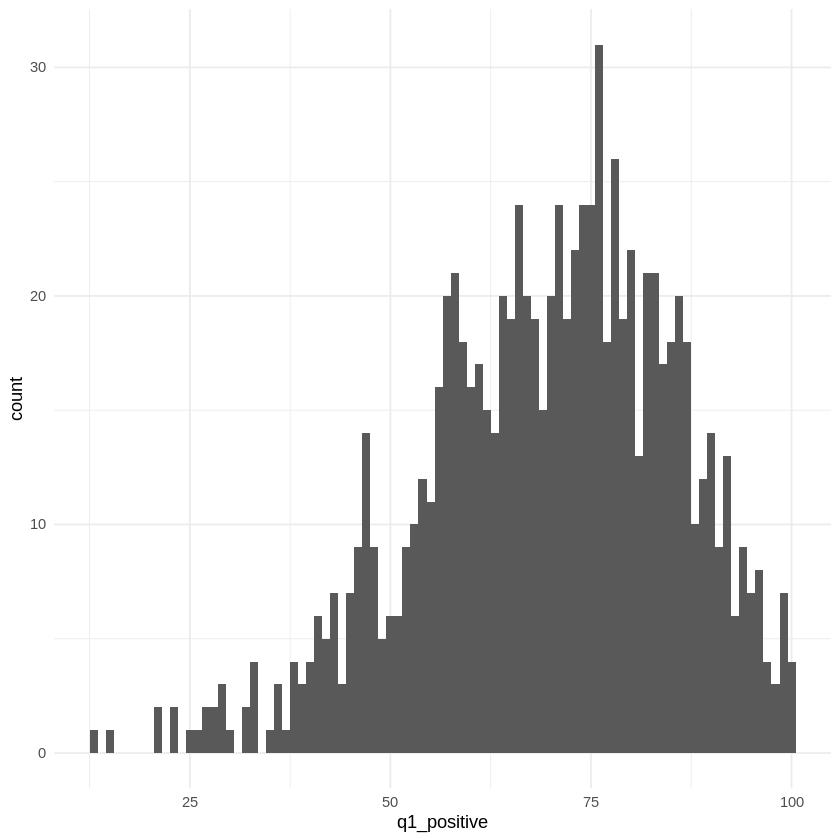

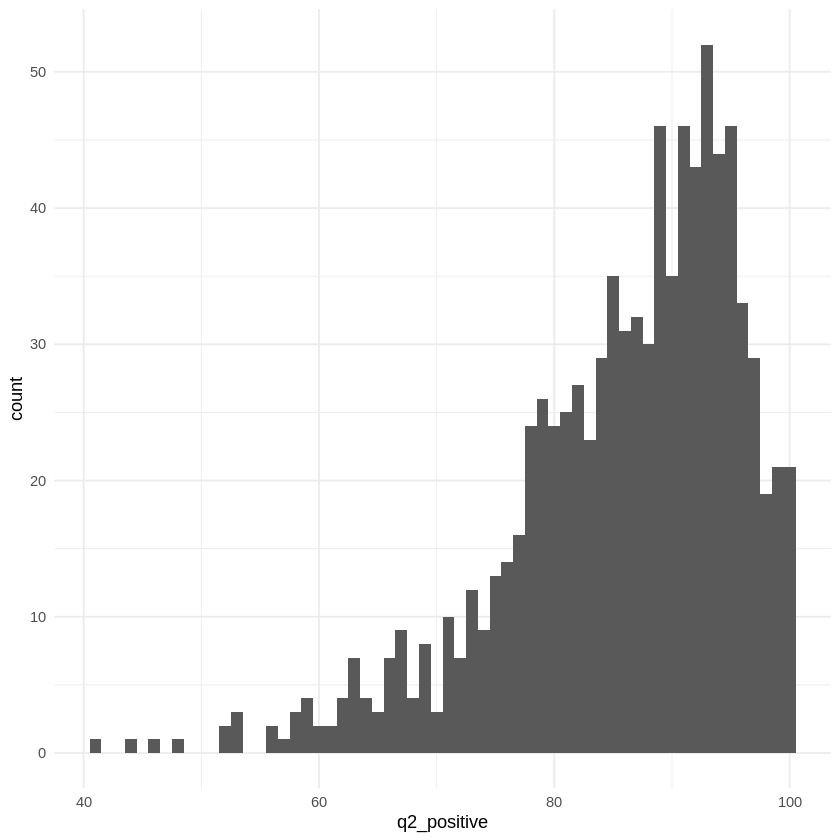

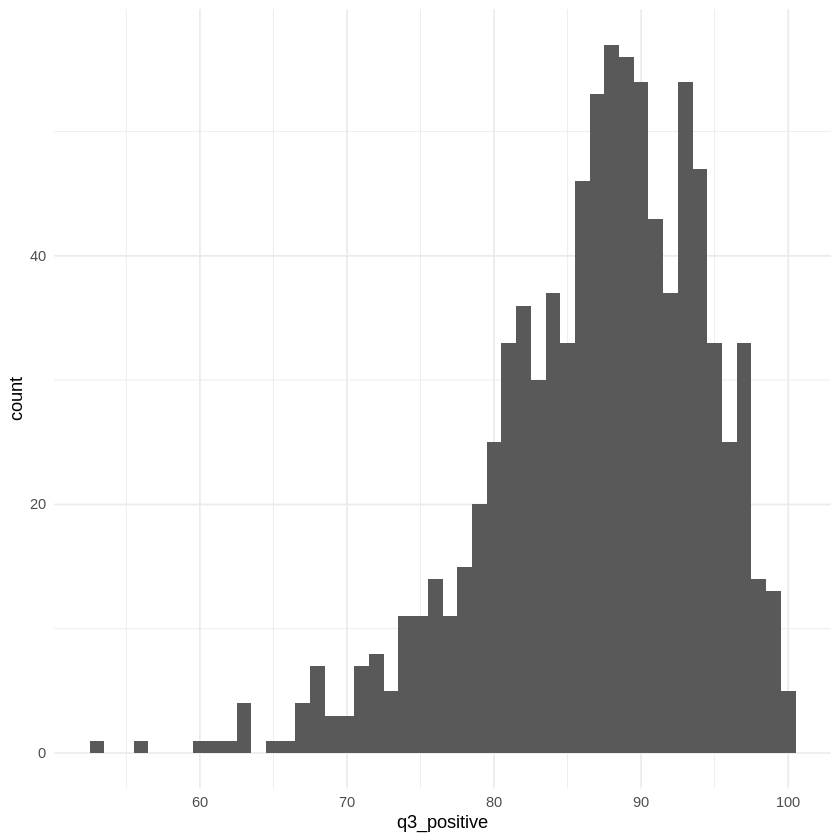

In [7]:
#Histogram for q1
ggplot(data = master_data) +
    geom_histogram(mapping = aes(x = q1_positive), binwidth = 1) +
    theme_minimal()

#Histogram for q2
ggplot(data = master_data) +
    geom_histogram(mapping = aes(x = q2_positive), binwidth = 1) +
    theme_minimal()

#Histogram for q3
ggplot(data = master_data) +
    geom_histogram(mapping = aes(x = q3_positive), binwidth = 1) +
    theme_minimal()

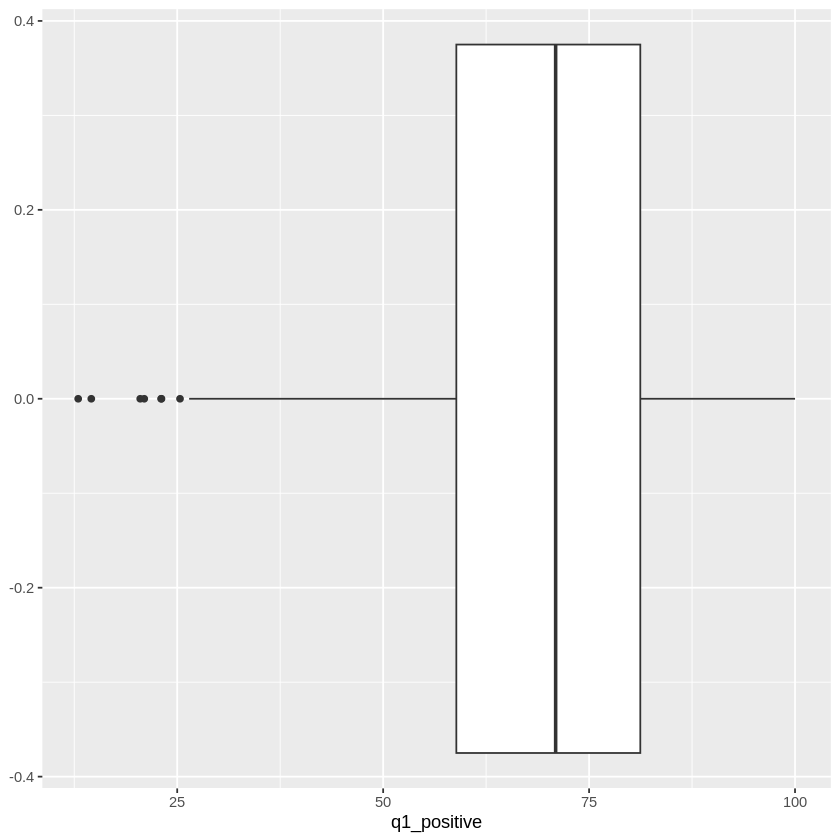

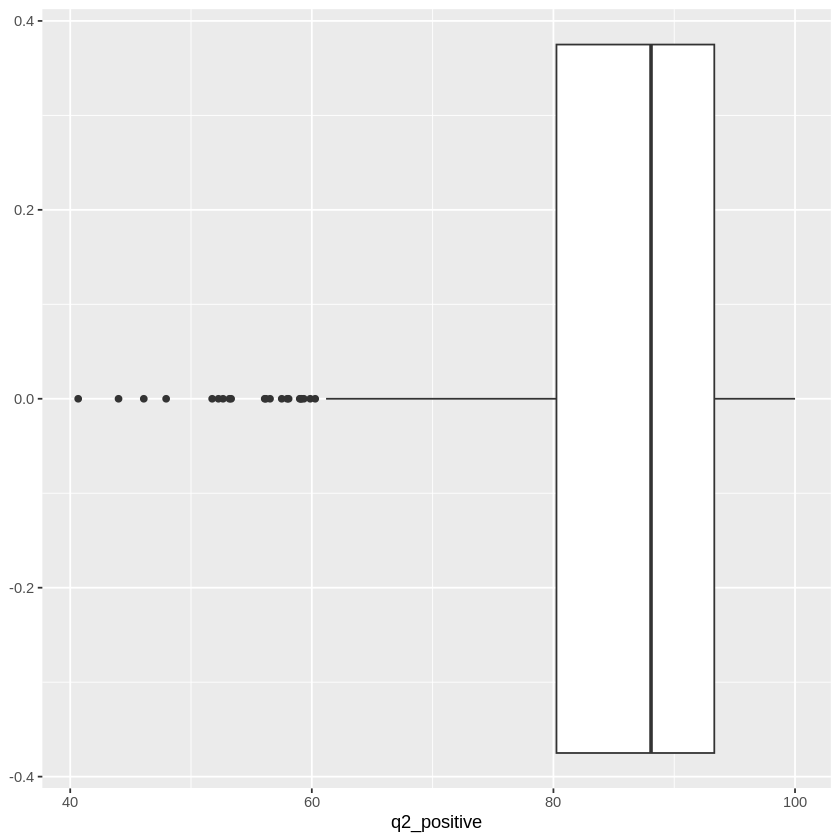

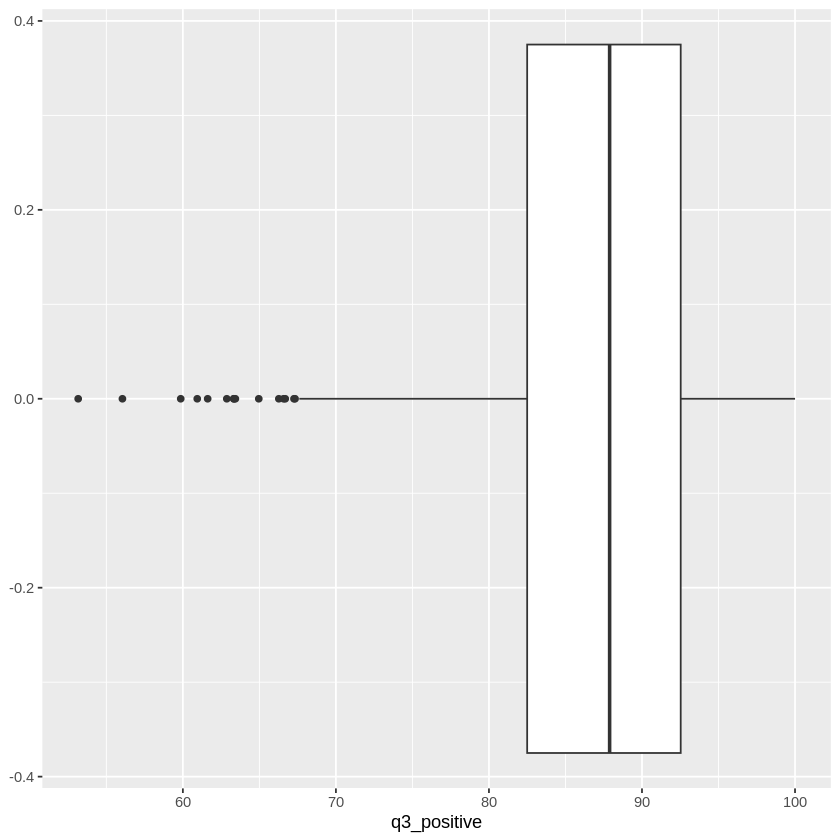

In [8]:
# Boxplot for q1
ggplot(data = master_data, mapping = aes(q1_positive)) +
  geom_boxplot()

# Boxplot for q2
ggplot(data = master_data, mapping = aes(q2_positive)) +
  geom_boxplot()

# Boxplot for q3
ggplot(data = master_data, mapping = aes(q3_positive)) +
  geom_boxplot()

In [9]:
income_data <- master_data %>%
    select(income_quintile, q1_positive)

head(income_data)

income_quintile,q1_positive
<fct>,<dbl>
4,73.31
1,78.51
3,87.11
4,81.81
4,25.34
1,73.95


In [10]:
master_data <- master_data %>% 
    mutate(income_quintile = as.factor(income_quintile)) %>% 
    mutate(employment_quintile = as.factor(employment_quintile))

In [11]:
regression_data <- master_data %>%
    select(q1_positive, q2_positive, q3_positive,
           income_quintile, age_distribution, minority_pop,
           employment_percentage, gender_distribution,
           urban_rural, employment_rate, DataZone) %>%
    filter(!is.na(income_quintile))

dim(regression_data)
head(regression_data)

[1] 893  11

q1_positive,q2_positive,q3_positive,income_quintile,age_distribution,minority_pop,employment_percentage,gender_distribution,urban_rural,employment_rate,DataZone
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
73.31,97.44,91.45,4,71.12,8.46,77.1,50.11,Urban,0.06,S01012126
78.51,93.93,87.44,1,69.95,9.06,69.8,48.86,Urban,0.31,S01010055
87.11,95.03,98.06,3,60.53,9.93,75.3,49.52,Rural,0.07,S01012014
81.81,92.53,94.82,4,64.95,3.42,74.8,51.36,Rural,0.04,S01013014
25.34,53.32,67.33,4,61.22,7.13,75.3,49.47,Rural,0.05,S01011052
73.95,70.04,88.54,1,82.37,14.25,69.8,49.25,Urban,0.15,S01010386


In [12]:
# Satisfaction Linear Regression Data
satisfaction_linear_regression <- lm(q1_positive ~ income_quintile, data = regression_data, na.action = na.exclude)
summary(satisfaction_linear_regression)


Call:
lm(formula = q1_positive ~ income_quintile, data = regression_data, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.041  -9.491   1.549  10.919  34.200 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      65.85614    1.01860  64.654  < 2e-16 ***
income_quintile2 -0.05653    1.47660  -0.038 0.969472    
income_quintile3  6.21988    1.46039   4.259 2.27e-05 ***
income_quintile4  8.18535    1.56386   5.234 2.07e-07 ***
income_quintile5  8.03332    2.05774   3.904 0.000102 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 888 degrees of freedom
Multiple R-squared:  0.05482,	Adjusted R-squared:  0.05056 
F-statistic: 12.88 on 4 and 888 DF,  p-value: 3.408e-10


In [13]:
# Access Linear Regression Data
access_linear_regression <- lm(q2_positive ~ income_quintile, data = regression_data, na.action = na.exclude)
summary(access_linear_regression)


Call:
lm(formula = q2_positive ~ income_quintile, data = regression_data, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.118  -5.361   2.213   7.443  15.222 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       84.7779     0.6582 128.809  < 2e-16 ***
income_quintile2   0.3487     0.9541   0.365  0.71487    
income_quintile3   2.4818     0.9436   2.630  0.00869 ** 
income_quintile4   1.8429     1.0105   1.824  0.06852 .  
income_quintile5   1.4178     1.3296   1.066  0.28656    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.938 on 888 degrees of freedom
Multiple R-squared:  0.0102,	Adjusted R-squared:  0.005738 
F-statistic: 2.287 on 4 and 888 DF,  p-value: 0.05837


In [14]:
# Communication Linear Regression Data
communication_linear_regression <- lm(q3_positive ~ income_quintile, data = regression_data, na.action = na.exclude)
summary(communication_linear_regression)


Call:
lm(formula = q3_positive ~ income_quintile, data = regression_data, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.083  -3.789   1.114   4.874  15.221 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       84.7789     0.4784 177.223  < 2e-16 ***
income_quintile2   0.7960     0.6935   1.148    0.251    
income_quintile3   3.0972     0.6859   4.516 7.16e-06 ***
income_quintile4   4.3539     0.7344   5.928 4.38e-09 ***
income_quintile5   4.6814     0.9664   4.844 1.50e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.223 on 888 degrees of freedom
Multiple R-squared:  0.05924,	Adjusted R-squared:  0.055 
F-statistic: 13.98 on 4 and 888 DF,  p-value: 4.588e-11


In [15]:
confint(satisfaction_linear_regression)
confint(access_linear_regression)
confint(communication_linear_regression)

,2.5 %,97.5 %
(Intercept),63.856996,67.855285
income_quintile2,-2.954562,2.841509
income_quintile3,3.353663,9.086094
income_quintile4,5.116063,11.254633
income_quintile5,3.994710,12.071928


,2.5 %,97.5 %
(Intercept),83.4861087,86.069593
income_quintile2,-1.5238872,2.221229
income_quintile3,0.6297811,4.333776
income_quintile4,-0.1402874,3.826133
income_quintile5,-1.1917121,4.027362


,2.5 %,97.5 %
(Intercept),83.8400302,85.717777
income_quintile2,-0.5650504,2.157002
income_quintile3,1.7511253,4.443290
income_quintile4,2.9124429,5.795345
income_quintile5,2.7846844,6.578049


In [16]:
# Run multiple linear regression for q1 with set2 confounders
mlr_satisfaction_fct <- 
    lm(q1_positive ~ income_quintile +
       age_distribution +
       employment_rate +
       minority_pop +
       gender_distribution +
       urban_rural,
       data = regression_data, 
       na.action = na.exclude)

summary(mlr_satisfaction_fct)
confint(mlr_satisfaction_fct)

AIC(satisfaction_linear_regression)
AIC(mlr_satisfaction_fct)


Call:
lm(formula = q1_positive ~ income_quintile + age_distribution + 
    employment_rate + minority_pop + gender_distribution + urban_rural, 
    data = regression_data, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.786  -8.303   2.187  10.462  31.581 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          60.04200   17.43583   3.444 0.000601 ***
income_quintile2      0.56762    1.94057   0.293 0.769971    
income_quintile3      4.86083    2.43214   1.999 0.045960 *  
income_quintile4      7.08919    2.85608   2.482 0.013244 *  
income_quintile5      8.59227    3.36948   2.550 0.010939 *  
age_distribution      0.03191    0.12111   0.264 0.792209    
employment_rate      15.24306   14.66831   1.039 0.299004    
minority_pop          0.27830    0.08019   3.471 0.000545 ***
gender_distribution   0.19066    0.27959   0.682 0.495461    
urban_ruralUrban    -12.38689    1.38974  -8.913  < 2e-16 ***
---
Signif. 

,2.5 %,97.5 %
(Intercept),25.82149988,94.2624952
income_quintile2,-3.24104994,4.3762940
income_quintile3,0.08737781,9.6342850
income_quintile4,1.48370162,12.6946786
income_quintile5,1.97914532,15.2053959
age_distribution,-0.20577525,0.2696037
employment_rate,-13.54576923,44.0318875
minority_pop,0.12091451,0.4356849
gender_distribution,-0.35807106,0.7393870
urban_ruralUrban,-15.11446668,-9.6593066


[1] 7422.531

[1] 7339.26

In [17]:
# Run multiple linear regression for q2 with set2 confounders
mlr_access_fct <- 
    lm(q2_positive ~ income_quintile +
       age_distribution +
       employment_rate +
       minority_pop +
       gender_distribution +
       urban_rural,
       data = regression_data, 
       na.action = na.exclude)

summary(mlr_access_fct)
confint(mlr_access_fct)

AIC(access_linear_regression)
AIC(mlr_access_fct)


Call:
lm(formula = q2_positive ~ income_quintile + age_distribution + 
    employment_rate + minority_pop + gender_distribution + urban_rural, 
    data = regression_data, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.865  -5.040   2.042   6.948  17.843 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         78.75053   11.50156   6.847 1.41e-11 ***
income_quintile2    -0.14015    1.28010  -0.109    0.913    
income_quintile3     1.10917    1.60436   0.691    0.490    
income_quintile4     0.56058    1.88401   0.298    0.766    
income_quintile5     0.98716    2.22268   0.444    0.657    
age_distribution    -0.07379    0.07989  -0.924    0.356    
employment_rate      6.01437    9.67597   0.622    0.534    
minority_pop         0.03304    0.05290   0.625    0.532    
gender_distribution  0.29447    0.18443   1.597    0.111    
urban_ruralUrban    -5.48925    0.91674  -5.988 3.09e-09 ***
---
Signif. codes:  0 ‘

,2.5 %,97.5 %
(Intercept),56.17694942,101.32411622
income_quintile2,-2.65254458,2.37224353
income_quintile3,-2.03964528,4.25798100
income_quintile4,-3.13708898,4.25824249
income_quintile5,-3.37519078,5.34951783
age_distribution,-0.23057823,0.08300592
employment_rate,-12.97620410,25.00495122
minority_pop,-0.07078168,0.13685693
gender_distribution,-0.06749745,0.65644180
urban_ruralUrban,-7.28849697,-3.68999547


[1] 6642.535

[1] 6596.204

In [18]:
# Run multiple linear regression for q3 with set2 confounders
mlr_communication_fct <- 
    lm(q3_positive ~ income_quintile +
       age_distribution +
       employment_rate +
       minority_pop +
       gender_distribution +
       urban_rural, 
       data = regression_data, 
       na.action = na.exclude)

summary(mlr_communication_fct)
confint(mlr_communication_fct)

AIC(communication_linear_regression)
AIC(mlr_communication_fct)


Call:
lm(formula = q3_positive ~ income_quintile + age_distribution + 
    employment_rate + minority_pop + gender_distribution + urban_rural, 
    data = regression_data, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.788  -3.917   1.228   4.792  15.561 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         78.40155    8.29628   9.450  < 2e-16 ***
income_quintile2     0.72839    0.92336   0.789  0.43041    
income_quintile3     2.27868    1.15726   1.969  0.04926 *  
income_quintile4     3.61646    1.35897   2.661  0.00793 ** 
income_quintile5     4.38909    1.60326   2.738  0.00631 ** 
age_distribution    -0.09219    0.05762  -1.600  0.10999    
employment_rate      5.68217    6.97944   0.814  0.41579    
minority_pop         0.15062    0.03816   3.947 8.53e-05 ***
gender_distribution  0.28650    0.13303   2.154  0.03154 *  
urban_ruralUrban    -4.45381    0.66126  -6.735 2.95e-11 ***
---
Signif. codes:  0 ‘

,2.5 %,97.5 %
(Intercept),62.118825003,94.68426811
income_quintile2,-1.083847346,2.54062044
income_quintile3,0.007387283,4.54997555
income_quintile4,0.949267611,6.28364989
income_quintile5,1.242448071,7.53573338
age_distribution,-0.205286638,0.02090711
employment_rate,-8.016071055,19.38040231
minority_pop,0.075730575,0.22550394
gender_distribution,0.025403876,0.54759395
urban_ruralUrban,-5.751640451,-3.15597822


[1] 6072.682

[1] 6012.761

In [19]:
# Write final regression dataset to file
write_csv(regression_data, "../data/regression_data.csv")

In [20]:
# Satisfaction Rank Linear Regression Data
satisfaction_linear_regression_rank <- lm(q1_positive ~ income_rank, data = master_data, na.action = na.exclude)
summary(satisfaction_linear_regression_rank)


Call:
lm(formula = q1_positive ~ income_rank, data = master_data, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.807  -9.835   2.209  10.816  34.199 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.405e+01  9.918e-01  64.577  < 2e-16 ***
income_rank 1.876e-03  2.891e-04   6.488 1.44e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.43 on 892 degrees of freedom
Multiple R-squared:  0.04507,	Adjusted R-squared:  0.044 
F-statistic:  42.1 on 1 and 892 DF,  p-value: 1.438e-10


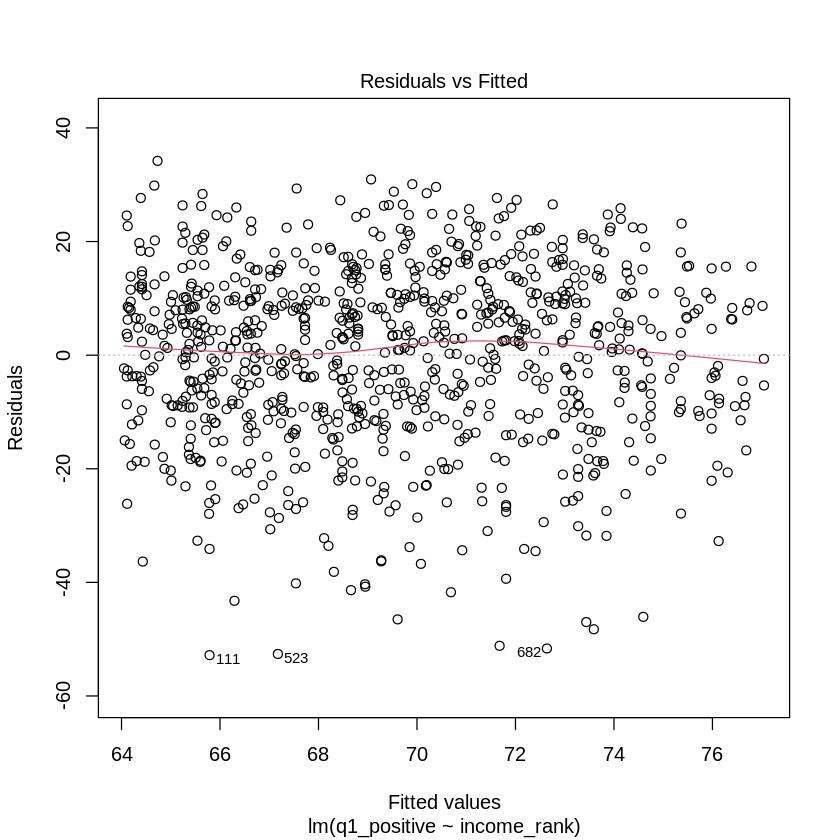

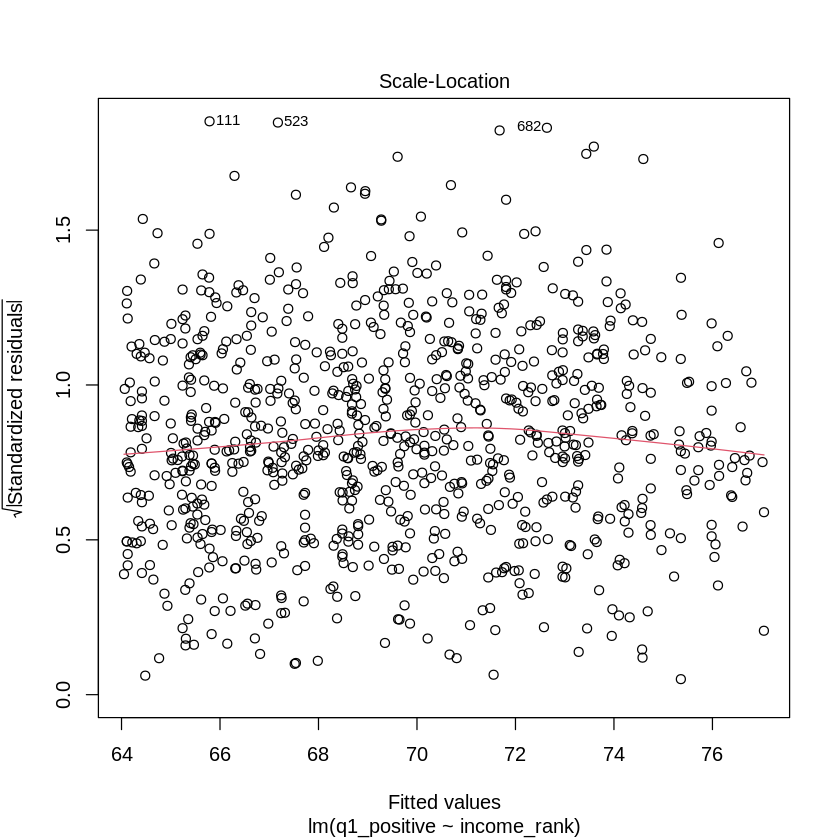

In [21]:
plot(satisfaction_linear_regression_rank, which = 1)
# plot(satisfaction_linear_regression_rank, which = 2)
plot(satisfaction_linear_regression_rank, which = 3)

`geom_smooth()` using formula = 'y ~ x'


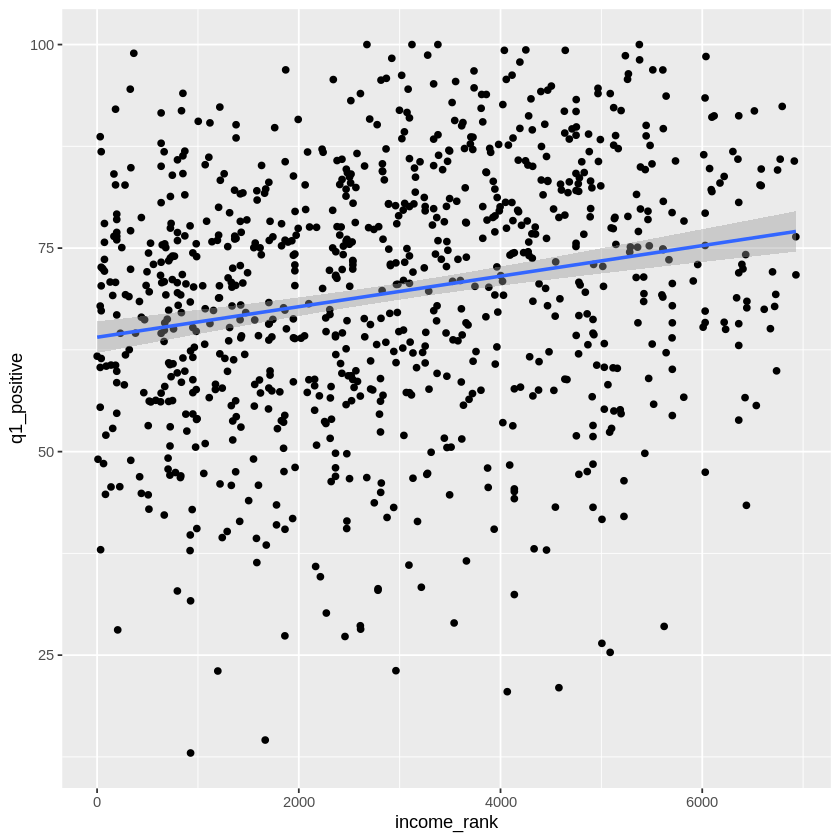

In [22]:
ggplot(satisfaction_linear_regression_rank, aes(x = income_rank, y = q1_positive)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, level = 0.95)